In [1]:
IMG_SIZE = 150
LR = 1e-3
classes = 6
batch_size = 128
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
# create dictionary for labels
def get_img(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory):
        if labels == 'glacier': label = '2'
        elif labels == 'buildings': label = '0'
        elif labels == 'forest': label = '1'
        elif labels == 'sea': label = '4'
        elif labels == 'street': label = '5'
        elif labels == 'mountain': label = '3'
    
        for file in os.listdir(directory+labels):
            image = cv2.imread(directory+labels+r'/'+str(file))
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images, Labels, random_state=2349)

In [4]:
Img_train, labels_train = get_img('/content/drive/My Drive/Colab Notebooks/Image Classification/Intel_Image_Classification/seg_train/seg_train/')
Img_train = np.array(Img_train)
labels_train= np.array(labels_train)
print(Img_train.shape)
print(labels_train.shape)

(14033, 150, 150, 3)
(14033,)


In [0]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________

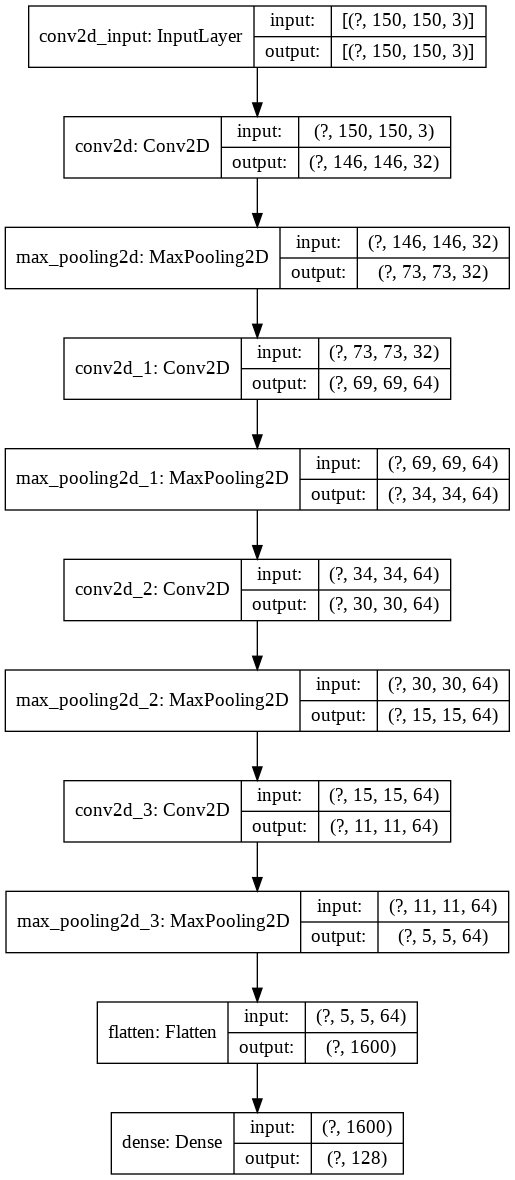

In [6]:
# create a convolutional base
model = Models.Sequential()
model.add(Layers.Conv2D(32, (5,5), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Layers.MaxPool2D((2, 2)))
model.add(Layers.Conv2D(64, (5,5), activation='relu'))
model.add(Layers.MaxPool2D((2, 2)))
model.add(Layers.Conv2D(64, (5,5), activation='relu'))
model.add(Layers.MaxPool2D((2, 2)))
model.add(Layers.Conv2D(64, (5,5), activation='relu'))
model.add(Layers.MaxPool2D((2, 2)))

model.add(Layers.Flatten())
model.add(Layers.Dense(128, activation="softmax"))


model.compile(optimizer=Optimizer.Adam(lr=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [7]:
trained = model.fit(Img_train, labels_train, batch_size= batch_size, epochs=16,validation_split=0.30)

Train on 9823 samples, validate on 4210 samples
Epoch 1/16
9823/9823 [==============================] - 25s 3ms/sample - loss: 4.7214 - acc: 0.3670 - val_loss: 1.2258 - val_acc: 0.5230
Epoch 2/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 1.1646 - acc: 0.5414 - val_loss: 1.1026 - val_acc: 0.5599
Epoch 3/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 1.0450 - acc: 0.5976 - val_loss: 0.9741 - val_acc: 0.6230
Epoch 4/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 0.9188 - acc: 0.6528 - val_loss: 0.9490 - val_acc: 0.6406
Epoch 5/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 0.8541 - acc: 0.6833 - val_loss: 0.8550 - val_acc: 0.6781
Epoch 6/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 0.7850 - acc: 0.7117 - val_loss: 0.8014 - val_acc: 0.7086
Epoch 7/16
9823/9823 [==============================] - 16s 2ms/sample - loss: 0.6905 - acc: 0.7492 - val_loss: 0.7534 - val_acc: 

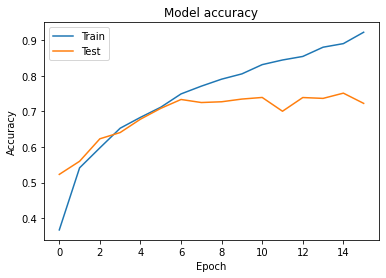

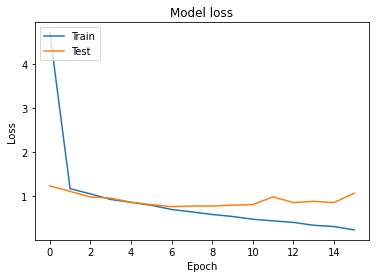

In [8]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [9]:
test_images,test_labels = get_images('../input/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

NameError: ignored